<a href="https://colab.research.google.com/github/pedrolaynes8-ui/Pedro-Laynes/blob/main/clase_3_biofino_Pedro_laynes_26_09_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧬 Notebook: Bases de datos transcriptómicas y proteómicas

En esta práctica trabajaremos con datos públicos de transcriptómica (GEO) y proteómica (PRIDE). Aprenderemos a acceder, explorar y visualizar estos datos usando Python y herramientas bioinformáticas.

## 🟦 1. Acceso a datos de GEO


### 🔍 Acceso a datos de GEO

Usaremos la librería `GEOparse` para descargar y explorar un conjunto de datos transcriptómicos. GEO contiene datos de microarreglos y RNA-seq de miles de estudios.

📦 Primero, instalamos la librería:


In [ ]:
!pip install GEOparse

In [ ]:
import GEOparse

# Descargamos un dataset de ejemplo (puedes cambiar el ID por otro)
gse = GEOparse.get_GEO(geo="GSE124646", destdir="./")

# Mostramos información general
print(gse.metadata)


25-Sep-2025 21:47:36 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
25-Sep-2025 21:47:36 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE124nnn/GSE124646/soft/GSE124646_family.soft.gz to ./GSE124646_family.soft.gz
INFO:GEOparse:Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE124nnn/GSE124646/soft/GSE124646_family.soft.gz to ./GSE124646_family.soft.gz
100%|██████████| 24.4M/24.4M [00:01<00:00, 15.0MB/s]
25-Sep-2025 21:47:38 DEBUG downloader - Size validation passed
DEBUG:GEOparse:Size validation passed
25-Sep-2025 21:47:38 DEBUG downloader - Moving /tmp/tmp2wsgkvhw to /content/GSE124646_family.soft.gz
DEBUG:GEOparse:Moving /tmp/tmp2wsgkvhw to /content/GSE124646_family.soft.gz
25-Sep-2025 21:47:38 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE124nnn/GSE124646/soft/GSE124646_family.soft.gz
DEBUG:GEOparse:Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/G

{'title': ['Breast cancer and normal breast tissue samples to estimate the effect of contamination of breast cancer samples with normal breast tissue'], 'geo_accession': ['GSE124646'], 'status': ['Public on May 30 2019'], 'submission_date': ['Jan 03 2019'], 'last_update_date': ['Jun 29 2019'], 'pubmed_id': ['31231679'], 'summary': ['PURPOSE: To estimate the effect of contamination with normal breast tissue for the development of gene signatures robust to pre-analytical conditions.', 'METHODS: We evaluated the effect of contamination with normal breast tissue on gene signatures by comparing microarray profiles of breast cancer samples contaminated with increasing amounts of normal breast tissue.'], 'overall_design': ['A set of 10 breast cancer samples were mixed with increasing amounts of 10 individual normal breast tissue samples. Samples were contaminated with 0, 10, 25, 50, 75, 80, 85, 90, 95 and 100 % of normal breast tissue, respectively.'], 'type': ['Expression profiling by array'

## 🟦 3. Visualización de expresión génica


### 📊 Visualización de expresión génica

Vamos a explorar la expresión de un gen específico en diferentes muestras.


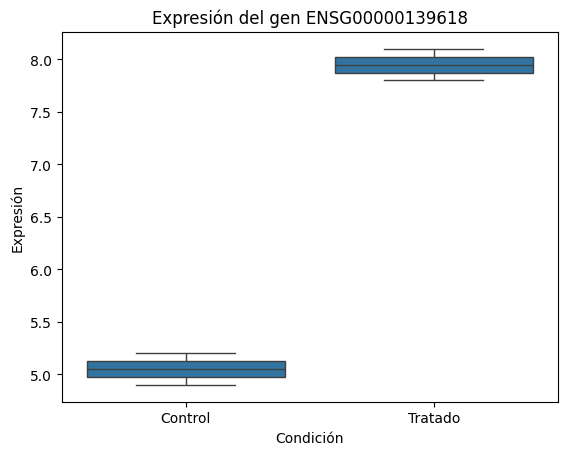

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extraemos la tabla de expresión
expression_data = gse.gsms

# Seleccionamos un gen de ejemplo (ajustar según el dataset)
gene_id = "ENSG00000139618"  # BRCA2 como ejemplo

# Simulamos una tabla de expresión para ilustrar
data = pd.DataFrame({
    "Muestra": ["A", "B", "C", "D"],
    "Condición": ["Control", "Tratado", "Control", "Tratado"],
    "Expresión": [5.2, 8.1, 4.9, 7.8]

})

sns.boxplot(x="Condición", y="Expresión", data=data)
plt.title(f"Expresión del gen {gene_id}")
plt.show()


## 🟦 4. Exploración de datos proteómicos desde PRIDE


### 🧪 Datos proteómicos desde PRIDE

PRIDE es una base de datos de espectrometría de masas. Vamos a simular la carga de una tabla de abundancia proteica.


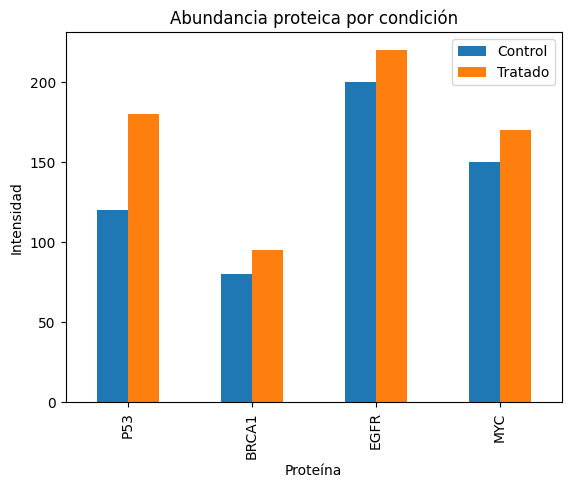

In [ ]:
# Simulamos una tabla de abundancia proteica
proteomics_data = pd.DataFrame({
    "Proteína": ["P53", "BRCA1", "EGFR", "MYC"],
    "Control": [120, 80, 200, 150],
    "Tratado": [180, 95, 220, 170]
})

proteomics_data.set_index("Proteína").plot(kind="bar")
plt.title("Abundancia proteica por condición")
plt.ylabel("Intensidad")
plt.show()


## 🟦 5. Análisis comparativo entre condiciones

Vamos a calcular la diferencia de expresión entre condiciones para cada proteína.


In [ ]:

proteomics_data["Diferencia"] = proteomics_data["Tratado"] - proteomics_data["Control"]
print(proteomics_data[["Proteína", "Diferencia"]])


  Proteína  Diferencia
0      P53          60
1    BRCA1          15
2     EGFR          20
3      MYC          20


📈 6. Preguntas de análisis comparativo

- ¿Qué significa una diferencia positiva o negativa en la expresión entre condiciones?

La diferencia de expresiòn positiva indica que frente a una cierta condicion los genes en estudio se expresan màs que el control de referencia, en cambio la diferencia negatica indica que los genes se expresan menos que el control.

- ¿Cómo podrías determinar si esa diferencia es estadísticamente significativa?

para ello tendria que usar pruebas estadistias entre dos grupos o mas apra ello tendria que tern la informacion primero de que si son datos normalos o no normales para aplicar pruebas parametricas y no parametricas respecrtivamente, luego realizar por ejemplo ANOVA y ver si existen diferencias estadisticamente significativas en base a mis hipotesis.

- ¿Qué hipótesis podrías plantear a partir de los resultados obtenidos?

por ejemplo en la clase hemos visto el analisis de expresion del gen de cancer de mama BRCA 2en condiciones de control y tratamiento a lo que el grafico apoyado por los datos obtenidos nos da un resultado de box plot en donde las medias estan bien alejadas en todo caso una hipotesis seria:

H0: no hay diferencia de la exresion de genes BRCA2 tanto en control y tratamiento.

